# 02 SARSA agent

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [2]:
import gym
env = gym.make('MountainCar-v0', render_mode = "rgb_array")
env._max_episode_steps = 1000

## SARSA agent 🤖

In [3]:
from sarsa_agent import SarsaAgent

alpha = 0.1 # learning rate
gamma = 0.9 # discount factor

agent = SarsaAgent(env, alpha, gamma)

## Train

In [4]:
from loops import train

rewards, max_positions = train(
    agent, env, n_episodes=10000, epsilon=0.1)

Epsilon: 0.10:   0%|          | 0/10000 [00:00<?, ?it/s]c:\Users\Ploita\anaconda3\envs\HandsOnRL\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
Epsilon: 0.10: 100%|██████████| 10000/10000 [03:10<00:00, 52.43it/s]


## Plot train metrics

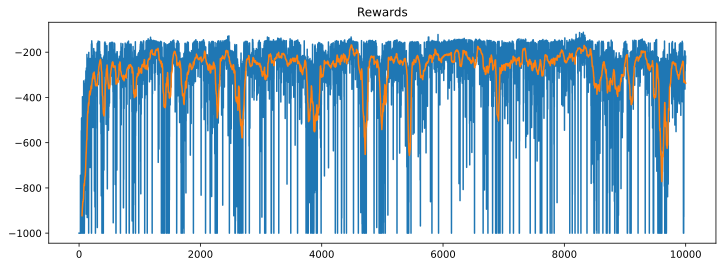

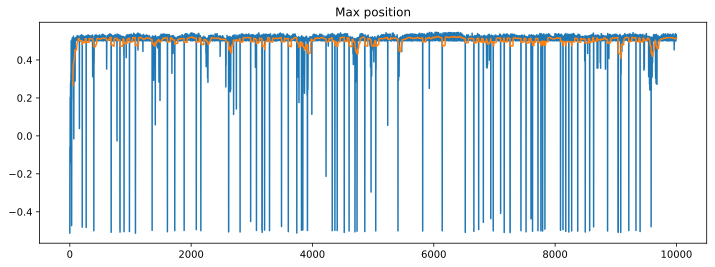

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Rewards")
pd.Series(rewards).plot(kind='line')
pd.Series(rewards).rolling(window=50).mean().plot(kind='line')
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Max position")    
pd.Series(max_positions).plot(kind='line')
pd.Series(max_positions).rolling(window=50).mean().plot(kind='line')
plt.show()

## Evaluate

In [6]:
from loops import evaluate

n_episodes = 1000
eval_rewards, eval_max_positions = evaluate(
    agent, env, n_episodes)

100%|██████████| 1000/1000 [00:23<00:00, 43.40it/s]


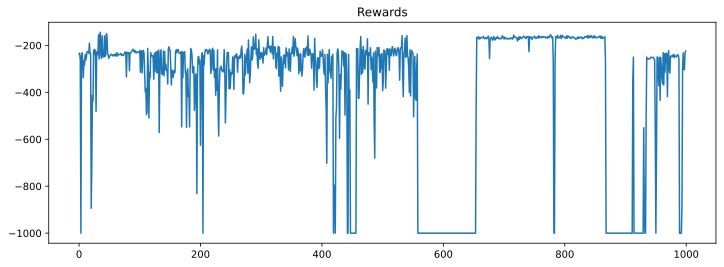

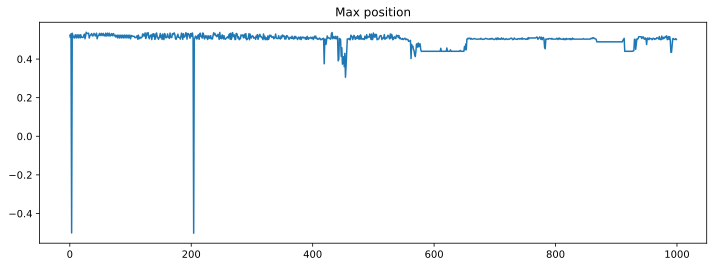

In [7]:
import pandas as pd

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Rewards")    
pd.Series(eval_rewards).plot(kind='line')
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Max position")    
pd.Series(eval_max_positions).plot(kind='line')
plt.show()

## And the success rate of our trained `SarsaAgent` is...

In [8]:
n_completed = sum([1 if m > 0.5 else 0 for m in eval_max_positions])
print(f'{n_completed} success out of {n_episodes} attempts')

819 success out of 1000 attempts


## Let's plot the agent's policy

#### 👉This is the agent's greedy policy.

#### 👉The greedy policy selects the action that maximizes the q-value function at any given state.

#### 👉In practice you can pick an epsilon-greedy policy, to avoid overfitting issues.

#### 👉Don't know what I am talking about? Read [part 2](https://towardsdatascience.com/hands-on-reinforcement-learning-course-part-2-1b0828a1046b) of the course.

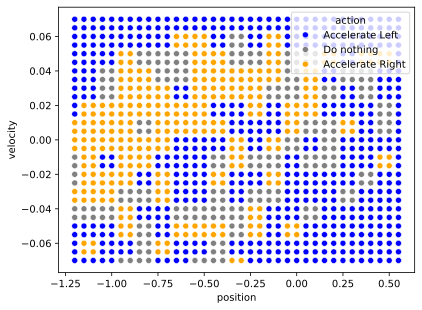

,position,velocity,action
0,-1.20,-0.070,Accelerate Left
1,-1.20,-0.065,Accelerate Left
2,-1.20,-0.060,Accelerate Left
3,-1.20,-0.055,Accelerate Left
4,-1.20,-0.050,Accelerate Left
...,...,...,...
1039,0.55,0.050,Accelerate Left
1040,0.55,0.055,Accelerate Left
1041,0.55,0.060,Accelerate Left
1042,0.55,0.065,Accelerate Left


In [9]:
from viz import plot_policy

positions = np.arange(env.min_position, env.max_position, 0.05)
velocities = np.arange(-env.max_speed, env.max_speed, 0.005)

plot_policy(agent, positions, velocities)

## Save the agent to disk 💾

In [10]:
from config import SAVED_AGENTS_DIR
path = SAVED_AGENTS_DIR / 'sarsa_agent_10k_steps'
print(f'Saving agent to {path}')
agent.save_to_disk(path)

Saving agent to C:\Users\Ploita\Documents\GitHub\hands-on-rl\02_mountain_car\saved_agents\sarsa_agent_10k_steps


## Let's see our agent in action 🎬

In [1]:
# Workaround for pygame error: "error: No available video device"
# See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# This is probably needed only for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

from viz import show_video

show_video(agent, env, sleep_sec=0.001)

NameError: name 'agent' is not defined

## And plot the policy 🎨

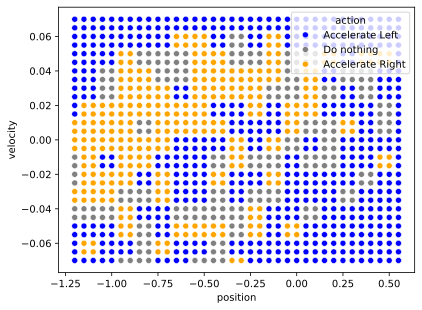

In [13]:
from viz import plot_policy

positions = np.arange(env.min_position, env.max_position, 0.05)
velocities = np.arange(-env.max_speed, env.max_speed, 0.005)
sarsa_policy = plot_policy(agent, positions, velocities)

## This is clearly different than the best one, from the MomentumAgent

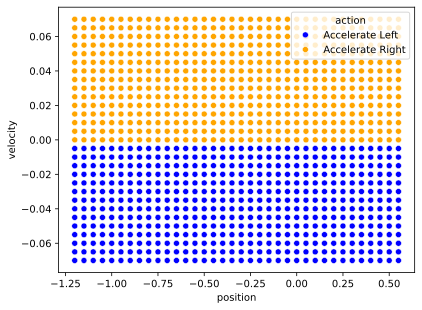

In [14]:
from momentum_agent import MomentumAgent

perfect_agent = MomentumAgent(env)
perfect_policy = plot_policy(perfect_agent, positions, velocities)

## Actually, they overlap only in 50% of the states

In [15]:
perfect_action = perfect_policy['action']
sarsa_action = sarsa_policy['action']

(perfect_action == sarsa_action).sum() / len(perfect_action)

0.4559386973180077